# <center> <u> Maxima and Minima of Functions </u> </center>

## 1. <u> Golden Search Method </u>

#### - Bracketing Method. 
#### - Guaranteed to Converge. 

## 2. <u> Gradient Descent </u> 

#### - Derivative Method. 
#### - 

## 3. <u> Line Search </u>

#### - 

## 4. <u> Powells Method </u> 

#### - Leverages Golden Search or Brents Method. 
#### - 

## 5. <u> Conjugate Gradient Method </u>

#### - 

## 6. <u> BFGS Method </u> 

#### - 

In [1]:
import numpy as np
from numba import jit 
import seaborn as sns
import matplotlib.pyplot as plt

## <center> Seaborn Plot Configuration </center> 

In [2]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (10, 5))

## <center> Golden Search Derivation </center> 

## <center> $ x_{2} - x_{1} = x_{4} - x_{3} $ </center>

## <center> $ z = \frac{x_{4} - x_{1}}{x_{3} - x_{1}} = \frac{x_{2} - x_{1} + x_{3} - x_{1}}{x_{3} - x_{1}} = \frac{x_{2} - x_{1}}{x_{3} - x_{1}} + 1 $ </center> 

## <center> $ z = \frac{x_{3} - x_{1}}{x_{2} - x_{1}} $ </center> 

## <center> $ z = z^{2} - z - 1 = 0 $ </center>

## <center> $ z = \frac{1 + \sqrt{5}}{2} = 1.618 $ </center>

In [3]:
@jit(nopython = True)
def golden_ratio_search(func, x1, x2, x3, x4):
    """
    Optimizes an Objective Function 
    
    Inputs: 
    - func: The Objective Function 
    - x1: 
    - x2: 
    - x3:
    - x4: 
    
    Output: 
    - The Optimized Value
    """
    
    err_tol = 1e-7
    z = 1.618
        
    f1 = func(x1)
    f2 = func(x2)
    f3 = func(x3)
    f4 = func(x4)
    
    itr_count = 0
    while (x4 - x1) > err_tol:

        if f2 < f3:
            x4, f4 = x3, f3
            x3, f3 = x2, f2
            x2 = x4 - (x4 - x1) / z
            f2 = func(x2)
            
        else:
            x1, f1 = x2, f2
            x2, f2 = x3, f3
            x3 = x1 + (x4 - x1) / z
            f3 = func(x3)
            
        itr_count += 1
    
    print("Golden Ratio Search Iteration Count: ", itr_count)
        
    return 0.5 * (x4 + x1)

## <center> The Buckingham Potential </center> 

## <center> $ V(r) = V_{0} \cdot [(\frac{\sigma}{r})^{6} - e^{-r / \sigma}]  $ </center>

In [4]:
@jit(nopython = True)
def buckingham_potential(r):
    """
    
    """
    
    V0 = 1
    sigma = 1
    
    return V0 * ((sigma / r)**6 - np.exp(-r / sigma))

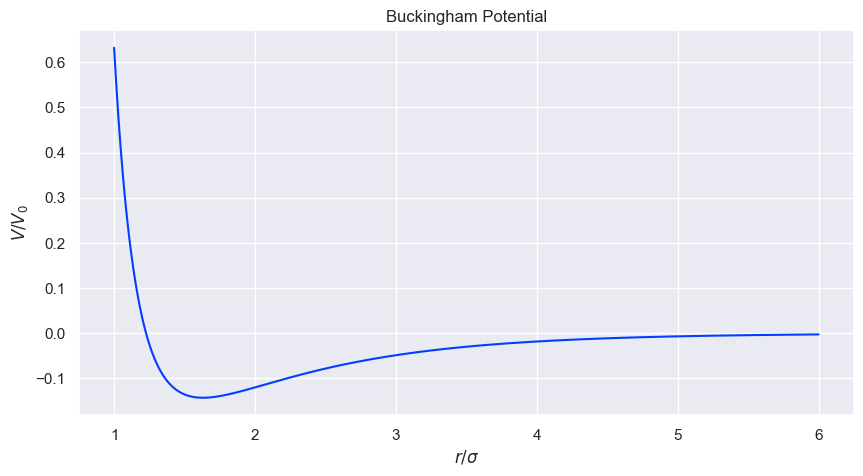

In [5]:
N = 1000

lower = 1
upper = 6
r = np.linspace(lower, upper, N)

buckingham = buckingham_potential(r)

fig = sns.lineplot(
    x = r, 
    y = buckingham,
)

fig.set(
    title = "Buckingham Potential",
    xlabel = "$ r / \sigma $",
    ylabel = "$ V / V_{0} $",
)

plt.show()

In [6]:
x1 = 1
x2 = 3
x3 = 4
x4 = 6
golden_ratio_search(buckingham_potential, x1, x2, x3, x4)

Golden Ratio Search Iteration Count:  36


1.5885834323724968

## <center> Gradient Descent </center> 

## <center> $ f'(x) = 0 $ </center>

## <center> $ x' = x - \gamma f'(x) $ </center>

## <center> $ \gamma \approx \frac{1}{f''(x)} $ </center>

In [7]:
@jit(nopython = True)
def gradient_descent(func, x):
    """
    Optimizes an Objective Function 
    
    Input: 
    - func: The Objective Function
    - x: Initial Guess
    
    Output:
    - The Optimized Value
    """
    
    err_tol = 1e-7
    
    gradient = func(x)
    gamma = 0.3
    
    x = x - gamma * gradient
    
    itr_count = 0
    while np.abs(gradient) > err_tol:
        
        gradient = func(x)
        x = x - gamma * gradient
        
        itr_count += 1
    
    print("Gradient Descent Iteration Count: ", itr_count)
    
    return x

## <center> Newton Raphson Method </center> 

## <center> $ x' = x - \frac{f'(x)}{f''(x)} $ </center>

In [8]:
@jit(nopython = True)
def newton_raphson_method(func1, func2, x):
    """
    
    """
    
    err_tol = 1e-7
    
    gradient = func1(x)
    gamma = func2(x)
    
    x = x - (gradient / gamma)
    
    itr_count = 0
    while np.abs(gradient) > err_tol:
        
        gradient = func1(x)
        gamma = func2(x)

        x = x - (gradient / gamma)
        
        itr_count += 1
    
    print("Newton Raphson Iteration Count: ", itr_count)
    
    return x

## <center> The Buckingham Potential Gradient </center> 

## <center> $ \frac{\partial{V}}{\partial{r}} [V(r)] = V_{0} \cdot [(\frac{\sigma}{r})^{6} - e^{-r / \sigma}]  $ </center>

## <center> $ V_{0} \frac{\partial{V}}{\partial{r}} [ \frac{\sigma}{r}^{6} - e^{-r / \sigma}] $ </center> 

## <center> $ V_{0} [-6 \frac{\sigma^6}{r^7} + \frac{e^{-r / \sigma}}{\sigma} ] $ </center> 

In [9]:
@jit(nopython = True)
def buckingham_potential_gradient(r):
    """
    
    """
        
    V0 = 1
    sigma = 1
    
    return V0 * ((-6 * sigma**6 / r**7) + (np.exp(-r / sigma) / sigma))

## <center> The Buckingham Potential Hessian </center> 

## <center> $ V_{0} \frac{\partial^2{V}}{\partial{r}^2} [\frac{\sigma^6}{r^8} - \frac{e^{-r / \sigma}}{\sigma^2}] $ </center> 

## <center> $ V_{0} [42 \frac{\sigma^6}{r^8} - \frac{e^{-r / \sigma}}{\sigma^2}] $ </center>

In [10]:
@jit(nopython = True)
def buckingham_potential_hessian(r):
    """
    
    """
    
    V0 = 1
    sigma = 1
    
    return V0 * ((42 * sigma**6 / r**8) - (np.exp(-r / sigma)) / sigma**2)

In [11]:
x = 1
gradient_descent(buckingham_potential_gradient, x)

Gradient Descent Iteration Count:  107


1.630516046384508

In [12]:
x = 1
newton_raphson_method(buckingham_potential_gradient, buckingham_potential_hessian, x)

Newton Raphson Iteration Count:  8


1.6305159287146183

## <center> Numerical Gradient Descent </center> 

## <center> $ x_{3}' = x_{2} - \gamma \frac{f(x_{2}) - f(x_{1})}{x_{2} - x_{1}} $ </center>

In [13]:
@jit(nopython = True)
def numerical_gradient_descent():
    """
    
    """
    
    return 0

In [14]:
@jit(nopython = True)
def numerical_newton_raphson():
    """
    
    """
    
    return 0

## <center> Powells Method </center> 

## <center> Conjugate Gradient Method </center> 

## <center> BFGS Method </center> 